In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## 1. Import fashion mnist data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Explore the data

In [4]:
train_images.shape  #60,000 images with each image having 28 X 28 pixels

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape   #10,000 images with each image having 28 x 28 pixel

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 3. Preprocess the data

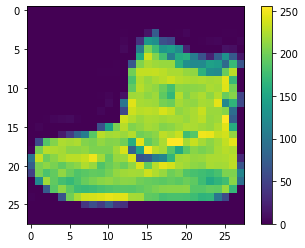

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Preprocess the images
train_images = train_images / 255.0

test_images = test_images / 255.0

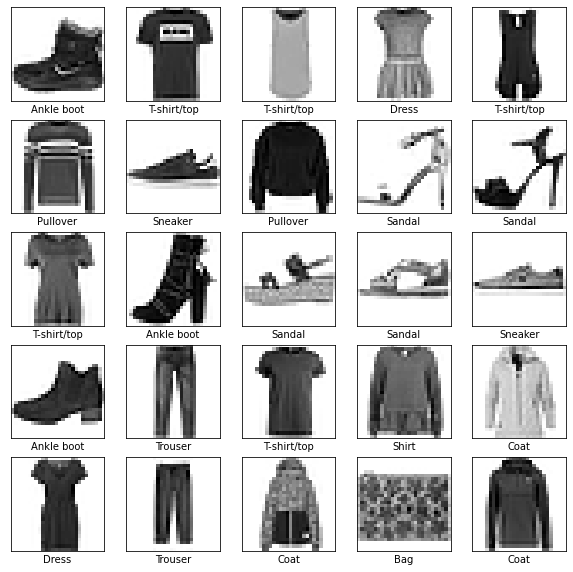

In [11]:
#Display the first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

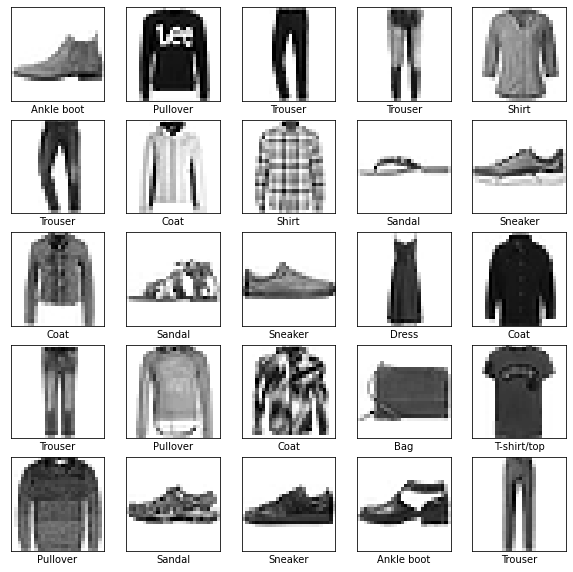

In [12]:
#Display first 25 images from testing set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

## 4. Build the model

#### 4.1 Set up the layers

In [13]:
model_without_batchnorm = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#### 4.2 Compile the model

In [14]:
model_without_batchnorm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. Train the Model

#### 5.1 Feed the model

In [15]:
history_1 = model_without_batchnorm.fit(train_images, train_labels, epochs=10, shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5018 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3388 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3140 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

#### 5.2 Evaluate accuracy

In [16]:
test_loss, test_acc = model_without_batchnorm.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy without batch normalization:', test_acc)

313/313 - 0s - loss: 0.3242 - accuracy: 0.8873

Test accuracy without batch normalization: 0.8873000144958496


Model is overfitting!!

#### 5.3 Model with batch normalization

Batch Normalization default values:
<ul>
<li>momentum = 0.99</li>
<li>epsilon = 0.001</li>
<li>beta = all zeros vector</li>
<li>gamma = all ones vector</li>
</ul>

In [17]:
model_with_batchnorm = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.BatchNormalization(),   #default
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(momentum=0.95,
                                    epsilon = 0.005),
    keras.layers.Dense(10, activation='softmax')
])

model_with_batchnorm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_2 = model_with_batchnorm.fit(train_images, train_labels, epochs=10, batch_size = 500, shuffle=True)

Epoch 1/10
120/120 [==============================] - 1s 11ms/step - loss: 1.6894 - accuracy: 0.7887
Epoch 2/10
120/120 [==============================] - 1s 11ms/step - loss: 1.6107 - accuracy: 0.8607
Epoch 3/10
120/120 [==============================] - 1s 11ms/step - loss: 1.5956 - accuracy: 0.8732
Epoch 4/10
120/120 [==============================] - 1s 11ms/step - loss: 1.5836 - accuracy: 0.8844
Epoch 5/10
120/120 [==============================] - 1s 12ms/step - loss: 1.5756 - accuracy: 0.8923
Epoch 6/10
120/120 [==============================] - 1s 11ms/step - loss: 1.5703 - accuracy: 0.8974
Epoch 7/10
120/120 [==============================] - 1s 11ms/step - loss: 1.5641 - accuracy: 0.9029
Epoch 8/10
120/120 [==============================] - 1s 11ms/step - loss: 1.5588 - accuracy: 0.9085
Epoch 9/10
120/120 [==============================] - 1s 11ms/step - loss: 1.5554 - accuracy: 0.9110
Epoch 10/10
120/120 [==============================] - 1s 11ms/step - loss: 1.5523 - accura

In [18]:
test_loss, test_acc = model_with_batchnorm.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy with batch normalization:', test_acc)

313/313 - 0s - loss: 1.5836 - accuracy: 0.8805

Test accuracy with batch normalization: 0.8805000185966492


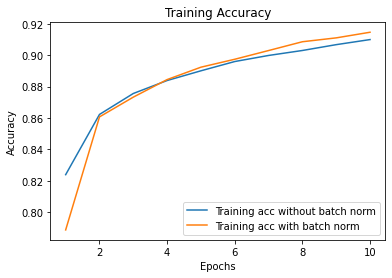

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

train_without_batch_metrics = history_1.history['accuracy']
train_with_batch_metrics = history_2.history['accuracy']
epochs = range(1, len(train_without_batch_metrics) + 1)
plt.plot(epochs, train_without_batch_metrics, label='Training Accuracy without batchnorm')
plt.plot(epochs, train_with_batch_metrics, label='Training Accuracy with batchnorm')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training acc without batch norm', 'Training acc with batch norm'])
plt.show()